In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_style('white')
sns.set_context('paper')
sns.set()
import random
from sklearn.manifold import TSNE

legend_size = 14

In [51]:
s = '22'
has_samp= True
models = [f'results_Mechanistic_h{s}']
selected = models[0]
data_path = f"data/proc/{selected}/"
treatment = np.load(data_path + 'treatments.npy')
devices = np.load(data_path + 'devices.npy')
y = np.load(data_path + 'observations.npy')
times = np.load(data_path + 'times.npy')


mu_50_post = np.load(data_path + 'mu_50_post.npy')
mu_25_post = np.load(data_path + 'mu_25_post.npy')
mu_75_post = np.load(data_path + 'mu_75_post.npy')
x_post = np.load(data_path + 'solution_xt_post.npy')
x_post = np.swapaxes(x_post,1,2)

mu_50_prior = np.load(data_path + 'mu_50_prior.npy')
mu_25_prior = np.load(data_path + 'mu_25_prior.npy')
mu_75_prior = np.load(data_path + 'mu_75_prior.npy')
x_prior = np.load(data_path + 'solution_xt_prior.npy')
x_prior = np.swapaxes(x_prior,1,2)

if has_samp:
    mu_50_post = np.load(data_path + 'mu_50_post_sample.npy')
    mu_25_post = np.load(data_path + 'mu_25_post_sample.npy')
    mu_75_post = np.load(data_path + 'mu_75_post_sample.npy')
    
    mu_50_prior = np.load(data_path + 'mu_50_prior_sample.npy')
    mu_25_prior = np.load(data_path + 'mu_25_prior_sample.npy')
    mu_75_prior = np.load(data_path + 'mu_75_prior_sample.npy')




In [52]:
print(treatment.shape)
print(devices.shape)
print(y.shape)
print(times.shape)
print(mu_75_prior.shape)
print(x_post.shape)

(48, 2)
(48, 7)
(48, 4, 100)
(100,)
(48, 4, 100, 200)
(48, 8, 100)


In [53]:
# print(np.sum(y==0))
# print(np.min(y))

In [54]:
# print(treatment)

## Plot scatter plots at end time point

In [55]:
is_post = True

is_post:  True


/var/folders/65/0xvnnn591ql2mz158__j26tw0000gn/T/ipykernel_10526/1297760176.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.semilogx(exp_treat, y_av_c[c, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[ci], zorder=ci+20)


results_Mechanistic_h22 l1_error_av:  5.873522117024376 is_post:  True


<Figure size 640x480 with 0 Axes>

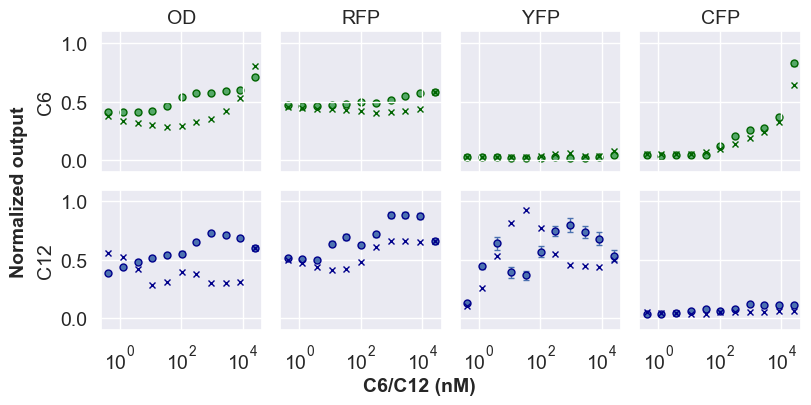

In [56]:
plt.clf()

fs = 14
ms = 5
print("is_post: ", is_post)
if is_post:
    mu_50 = mu_50_post
    mu_75 = mu_75_post
    mu_25 = mu_25_post
else:
    mu_50 = mu_50_prior
    mu_75 = mu_75_prior
    mu_25 = mu_25_prior
    
    
mu_50[mu_50 < 0] =0
mu_25[mu_25 <0] = 0
mu_75[mu_75 <0] = 0
    
#colors = sns.color_palette("Set2", 8)
obs_mk = 'x'
pred_mk = 'o'
colors = ['g','b', 'gray']
edges = ['darkgreen','darkblue', 'darkgray']
device_id = devices[0]

l1_error = 0
unique_treat = np.unique(treatment)
unique_devices = np.unique(devices, axis=0)
#print("unique_devices: ", unique_devices, len(unique_devices))
cols = ['OD', 'RFP', 'YFP', 'CFP']
conditions = ['C6', 'C12']
fig, axs = plt.subplots(2, len(cols), sharex=True, sharey=True, figsize=(8, 4))


for t_idx, treat in enumerate(unique_treat):
    comp = np.equal(devices, device_id)
    sel_device = np.sum(comp, 1) == devices.shape[1]
    for  ci, cv in enumerate(conditions):
        idx_C = np.logical_and(np.logical_and(treatment[:, ci] ==  treat, sel_device), treatment[:, ci] >0)
    
        for c in range(len(cols)):
            if has_samp:
                mu_50_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2)
                #print("mu_50_av_c: ", mu_50_av_c.shape)
#                 mu_75_av_c = np.mean(np.mean(mu_75[idx_C], 0),2)
#                 mu_25_av_c = np.mean(np.mean(mu_25[idx_C], 0), 2)
                std = np.std(np.std(mu_50[idx_C], 0), 2)
                mu_75_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2) + 2* std
                mu_25_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2) - 2* std
            else:
                mu_50_av_c = np.mean(mu_50[idx_C], 0)
                mu_75_av_c = np.mean(mu_75[idx_C], 0)
                mu_25_av_c = np.mean(mu_25[idx_C], 0)
            y_av_c = np.mean(y[idx_C], 0)
           
            
            if np.sum(idx_C) > 0:
                l1_error += np.sum(np.abs(y_av_c - mu_50_av_c))
         
            ax = axs[ci, c]
            
            exp_treat = np.exp(treat)-1
        
#             if c == 3 and t_idx == len(unique_treat)-1:
#                 ax.errorbar(exp_treat, mu_50_av_c[c, -1], fmt=pred_mk, ms=ms, lw=1, mec=edges[0], 
#                     color=colors[ci], zorder=ci,  label='{} (model)'.format(conditions[ci]))
#                 ax.semilogx(exp_treat, y_av_c[c, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[0], zorder=ci+20, 
#                          label='{} (data)'.format(conditions[ci]))
            
           
            lower = [(mu_50_av_c[c, -1] - mu_25_av_c[c, -1])]
            upper = [(mu_75_av_c[c, -1] - mu_50_av_c[c, -1])]
            yerr = [lower, upper]
            ax.errorbar(exp_treat, mu_50_av_c[c, -1], 
                        yerr=yerr, 
                        fmt=pred_mk, ms=ms, lw=1, mec=edges[ci], 
                   color=colors[ci], zorder=ci, solid_capstyle='projecting', capsize=2)
            
            ax.semilogx(exp_treat, y_av_c[c, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[ci], zorder=ci+20)
            
    
            ax.set_ylim(-0.1,1.1)
            ax.tick_params(axis='both', which='major', labelsize=fs)
            ax.set_xticks(np.logspace(0,4,3))
            ax.set_yticks([0, 0.5, 1])
    

for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)

for ax, row in zip(axs[:, 0], conditions):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs,  fontweight='bold')
fig.text(0.5, -0.01, "C6/C12 (nM)", ha="center", va="bottom", fontsize=fs,  fontweight='bold')
#fig.legend(bbox_to_anchor=(0.95,0.89), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()

l1_error_av = l1_error/(len(unique_treat)* len(cols) * devices.shape[1] )
print(selected, "l1_error_av: ", l1_error_av, "is_post: ", is_post)

is_post:  True


/var/folders/65/0xvnnn591ql2mz158__j26tw0000gn/T/ipykernel_10526/318419159.py:83: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.semilogx(exp_treat, y_av_c[r, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[ci], zorder=ci+20)


results_Mechanistic_h22 l1_error_av:  11.747044234048753 is_post:  True


<Figure size 640x480 with 0 Axes>

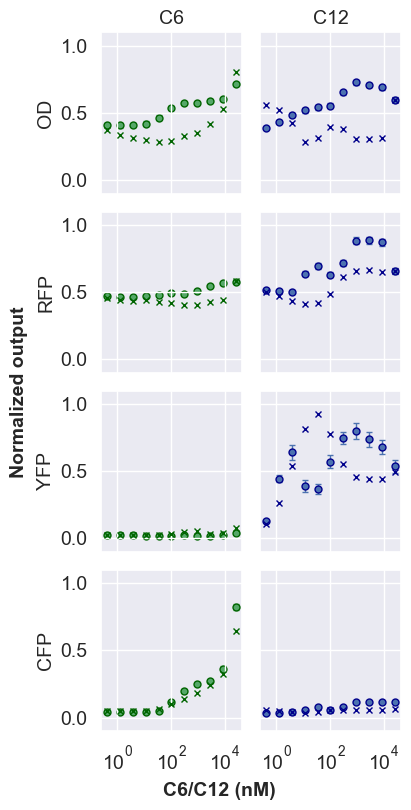

In [57]:
plt.clf()

fs = 14
ms = 5
print("is_post: ", is_post)
if is_post:
    mu_50 = mu_50_post
    mu_75 = mu_75_post
    mu_25 = mu_25_post
else:
    mu_50 = mu_50_prior
    mu_75 = mu_75_prior
    mu_25 = mu_25_prior
    
    
mu_50[mu_50 < 0] =0
mu_25[mu_25 <0] = 0
mu_75[mu_75 <0] = 0
    
#colors = sns.color_palette("Set2", 8)
obs_mk = 'x'
pred_mk = 'o'
colors = ['g','b', 'gray']
edges = ['darkgreen','darkblue', 'darkgray']
device_id = devices[0]

l1_error = 0
unique_treat = np.unique(treatment)
unique_devices = np.unique(devices, axis=0)
#print("unique_devices: ", unique_devices, len(unique_devices))
rows = ['OD', 'RFP', 'YFP', 'CFP']
conditions = ['C6', 'C12']
cols = conditions
fig, axs = plt.subplots(len(rows), 2, sharex=True, sharey=True, figsize=(4, 8))


for t_idx, treat in enumerate(unique_treat):
    comp = np.equal(devices, device_id)
    sel_device = np.sum(comp, 1) == devices.shape[1]
    for  ci, cv in enumerate(conditions):
        idx_C = np.logical_and(np.logical_and(treatment[:, ci] ==  treat, sel_device), treatment[:, ci] >0)
        c = ci
    
        for r in range(len(rows)):
            if has_samp:
                mu_50_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2)
                #print("mu_50_av_c: ", mu_50_av_c.shape)
#                 mu_75_av_c = np.mean(np.mean(mu_75[idx_C], 0),2)
#                 mu_25_av_c = np.mean(np.mean(mu_25[idx_C], 0), 2)
                std = np.std(np.std(mu_50[idx_C], 0), 2)
                mu_75_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2) + 2* std
                mu_25_av_c = np.mean(np.mean(mu_50[idx_C], 0), 2) - 2* std
            else:
                mu_50_av_c = np.mean(mu_50[idx_C], 0)
                mu_75_av_c = np.mean(mu_75[idx_C], 0)
                mu_25_av_c = np.mean(mu_25[idx_C], 0)
            y_av_c = np.mean(y[idx_C], 0)
           
            
            if np.sum(idx_C) > 0:
                l1_error += np.sum(np.abs(y_av_c - mu_50_av_c))
         
            #ax = axs[ci, c]
            ax = axs[r, c]
            
            exp_treat = np.exp(treat)-1
        
#             if c == 3 and t_idx == len(unique_treat)-1:
#                 ax.errorbar(exp_treat, mu_50_av_c[c, -1], fmt=pred_mk, ms=ms, lw=1, mec=edges[0], 
#                     color=colors[ci], zorder=ci,  label='{} (model)'.format(conditions[ci]))
#                 ax.semilogx(exp_treat, y_av_c[c, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[0], zorder=ci+20, 
#                          label='{} (data)'.format(conditions[ci]))
            
           
            lower = [(mu_50_av_c[r, -1] - mu_25_av_c[r, -1])]
            upper = [(mu_75_av_c[r, -1] - mu_50_av_c[r, -1])]
            yerr = [lower, upper]
            ax.errorbar(exp_treat, mu_50_av_c[r, -1], 
                        yerr=yerr, 
                        fmt=pred_mk, ms=ms, lw=1, mec=edges[ci], 
                   color=colors[ci], zorder=ci, solid_capstyle='projecting', capsize=2)
            
            ax.semilogx(exp_treat, y_av_c[r, -1], 'k'+obs_mk, ms=ms, lw=1, color=edges[ci], zorder=ci+20)
            
    
            ax.set_ylim(-0.1,1.1)
            ax.tick_params(axis='both', which='major', labelsize=fs)
            ax.set_xticks(np.logspace(0,4,3))
            ax.set_yticks([0, 0.5, 1])
    

for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs,  fontweight='bold')
fig.text(0.5, -0.01, "C6/C12 (nM)", ha="center", va="bottom", fontsize=fs,  fontweight='bold')
#fig.legend(bbox_to_anchor=(0.95,0.89), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()

l1_error_av = l1_error/(len(unique_treat)* len(cols) * devices.shape[1] )
print(selected, "l1_error_av: ", l1_error_av, "is_post: ", is_post)